# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [37]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')
#hospital_read_df

****
## Preliminary Analysis

In [38]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Sushama\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
#clean_hospital_read_df[81:-3]

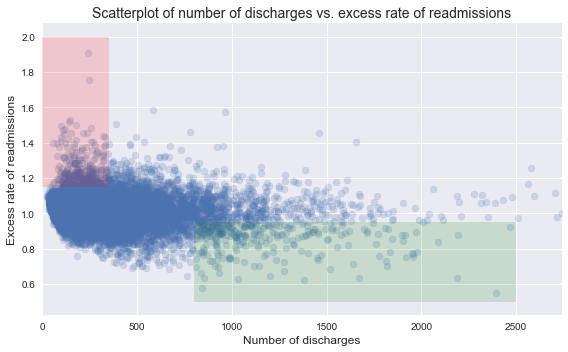

In [40]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
## lets analyse all conclusion one by one

In [9]:
##Overall, rate of readmissions is trending down with increasing number of discharges


In [ ]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])


C:\Users\Sushama\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sushama\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


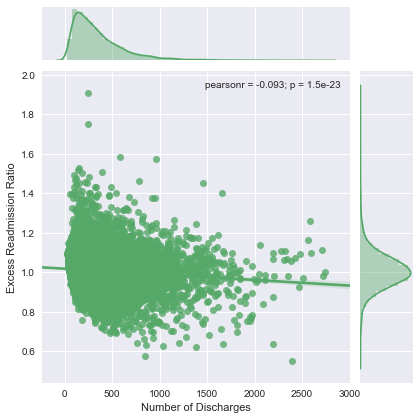

In [14]:
sns.jointplot(data=clean_hospital_read_df[81:-3], x='Number of Discharges', y='Excess Readmission Ratio', kind='reg', color='g')


with very low value of Pearson coeffiecient ,it doesnot sate that Overall, rate of readmissions is trending down with 
increasing number of discharges as stated above.


In [ ]:
 ##With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
## With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 


By above sentences it means that the incidents of  excess rate of readmissions is more when the number of discharge are
in range of 0-350 and incidents of excess rate of readmissions are less when number of discharges are in the range of 800-2500

Lets formulate the hypothesis:
Ha : The incidents of excess rate of readmission are same for different ranges of number of discharges
H0 :The incidents of excess rate of readmission are different for different ranges of number of discharges



In [32]:

import scipy.stats as stats
df=clean_hospital_read_df[81:-3]
clean_hospital_read_df_low=df[df['Number of Discharges']<=350]

clean_hospital_read_df_high=df[(df['Number of Discharges']>=800) & (df['Number of Discharges']<=2500)]


In [34]:
print (stats.ttest_ind(clean_hospital_read_df_low['Excess Readmission Ratio'].values,clean_hospital_read_df_high['Excess Readmission Ratio'].values,equal_var=False))

Ttest_indResult(statistic=6.969280001489288, pvalue=5.733717856757326e-12)


As the p value is less than 0.01 assuming 99% confidence interval,
we can reject the null hypothesis and can say that the average excess rate of readmissions of the hospitals
with less than 350 discharges is higher than the average excess rate of readmissions of the hospitals with 800-2500 charges.

# STATISTICS

 In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission
rate greater than 1 

In [52]:
hospital100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]



In [43]:
print('mean excess readmission rate is {}'.format(np.mean(hospital100['Excess Readmission Ratio'])))


mean excess readmission rate is 1.0226183501683506


In [53]:
readmin_greater_than_1 = hospital100[hospital100['Excess Readmission Ratio'] >1]


In [48]:
print('% of  excess readmission rate is greater than 1 is  {}'.format(len(readmin_greater_than_1)/len(hospital100['Excess Readmission Ratio'])*100))


% of  excess readmission rate is greater than 1 is  59.18045705279747


Result : mean access rate is 1.023 but 59.18% have excess readmission rate greater than 1 and not 63%.

# Lets verify  following statistics

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [59]:
hospital1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]


In [60]:
print('mean excess readmission rate is {}'.format(np.mean(hospital1000['Excess Readmission Ratio'])))


mean excess readmission rate is 0.9783354211663071


In [61]:
readmin_greater_than_1 = hospital1000[hospital1000['Excess Readmission Ratio'] >1]


In [62]:
print('% of  excess readmission rate is greater than 1 is  {}'.format(len(readmin_greater_than_1)/len(hospital1000['Excess Readmission Ratio'])*100))


% of  excess readmission rate is greater than 1 is  44.49244060475162


we can verify that in hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

Lets review the below sentence made by Author

+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

In [ ]:
We can not say that there is a significant correlation between number of discharges vs readmission rate as we observed 
correlation coefficient is very low.

 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

statistical significance tells that average excess rate of readmissions of the hospitals with less than 350 discharges is 
higher than the average excess rate of readmissions of the hospitals with 800-2500 discharges.However practically it is not
possible to say this and we can say thet there are other factors such as ,situation ,geographical location,population at the 
hospital,condition of the patient which needs to taken care in order to draw a conclusion and we can not simply say that smaller
hospitals may be lacking necessary resources to ensure quality and prevent complications that lead to readmission.

5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

By looking at the scatterplot we can get the generel trend of the data and with color highlights i.e. green and red ares
we can easily able to focus but there are no labels to understand on what Author trying to say.Also it is not easy to predict the number of data points bound to 
perticular area i.e. under red and green area.






C:\Users\Sushama\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sushama\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


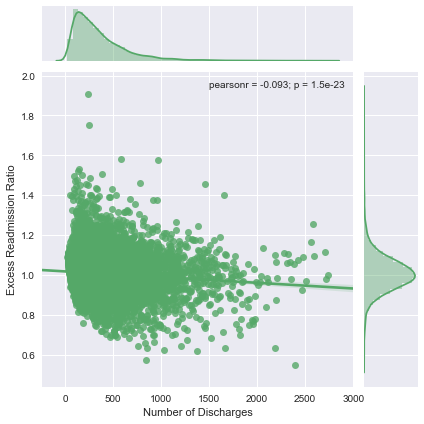

In [65]:
    
sns.jointplot(data=clean_hospital_read_df[81:-3], x='Number of Discharges', y='Excess Readmission Ratio', kind='reg', color='g')



I think this graph will be serve as an aternative to give direct information about the data distribution and pattern